# K-Nearest Neighbours

## Computational Basics

In [2]:
import pandas as pd
import numpy as np
import math
import operator

### Euclidean Metric

In [3]:
def euclidean_dist(p, q, dim):
    dist = 0
    for x in range(dim):
        dist += pow(p[x] - q[x], 2)
    return math.sqrt(dist)

### Determine the Nearest Neighbours

In [4]:
def get_neighbours(p, scope, k):
    distances = []
    dim = len(p) - 1
    for q in scope:
        dist = euclidean_dist(p, q, dim)
        distances.append((q, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbours = map(lambda x: x[0], distances[:k])
    return neighbours

In [5]:
def get_response(neighbours):
    votes = {}
    for vote in map(lambda x: x[-1], neighbours):
        votes[vote] = votes.get(vote, 0) + 1
    sorted_votes = sorted(votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]

### Accuracy

In [21]:
def calc_accuracy(test, pred):
    correct = sum(1 for i in range(len(test)) if test[i] == pred[i])
    return (correct / float(len(test))) * 100.0

## Implementation on Data

### Loading Data

In [7]:
df = pd.read_csv('./data/knn-data.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 2})
labels = df['diagnosis'].tolist()
df['labels'] = labels
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


### Train-Test Split

In [32]:
np.random.seed(1)
mask = np.random.rand(len(df)) < 0.7
train, test = df[mask], df[~mask]
print("Train, test number:", len(train), len(test))

Train, test number: 395 174


### Calculating Labels

In [33]:
k = 3

pred = []
train_list = train.values.tolist()
test_list = test.values.tolist()

for p in test_list:
    neighbours = get_neighbours(p, train_list, k)
    result = get_response(neighbours)
    pred.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(p[-1]))

> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, act

### Confusion Matrix and Accuracy

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = list(map(lambda x: x[-1], test_list))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred) * 100, ", Custom Accuracy:", calc_accuracy(y_test, pred))

Confusion Matrix:
 [[ 52   5]
 [  6 111]]
Accuracy: 93.67816091954023 , Custom Accuracy: 93.67816091954023


## KNN with Scikit-Learn

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


X = np.array(df.drop(['labels'], axis=1))
y = np.array(df['labels'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.3f}")
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))

Точность: 0.942

Отчет по классификации:
              precision    recall  f1-score   support

           1       0.93      0.90      0.92        63
           2       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



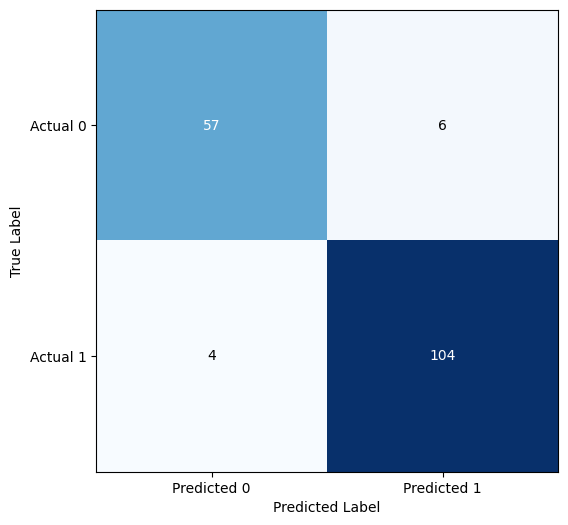

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap='Blues')

plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), 
                ha='center', va='center', 
                color='white' if cm[i, j] > 50 else 'black')

plt.show()